<a href="https://colab.research.google.com/github/Srinunosina/npoi/blob/master/ML_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Simple Linear Regression
# 1. Reading and Understanding Data
# 2. Training model
# 3. Residual Analysis (Should not normally distributed )
# 4. Predicting and Evaluating model

In [0]:
# Importingn name space
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api   as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [39]:
#  reading file

url='https://raw.githubusercontent.com/Srinunosina/FDS/master/advertising.csv?token=AAUS2HFSNK5PJNFGWT6DU2C6ZDMGM'

advertising = pd.read_csv(url)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# understanding data set
advertising.shape

(200, 4)

In [7]:
# uniqueness
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [17]:
# summary statistics
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


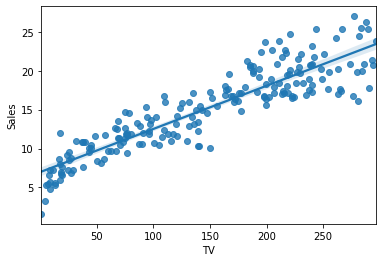

In [9]:
# Scatter plot
# Visualise the data. finding relation btween Target variable and Predictor variables
sns.regplot(x='TV', y='Sales', data=advertising)

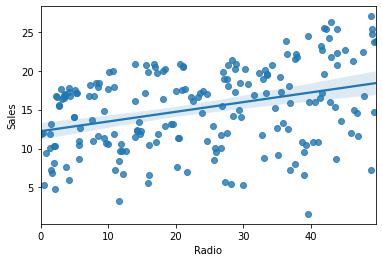

In [10]:
sns.regplot(x='Radio', y='Sales', data=advertising)

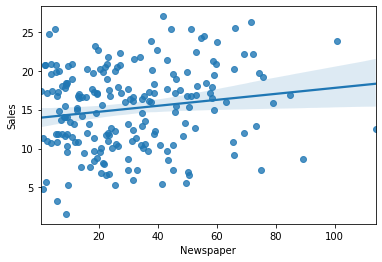

In [11]:
sns.regplot(x='Newspaper', y='Sales', data=advertising)

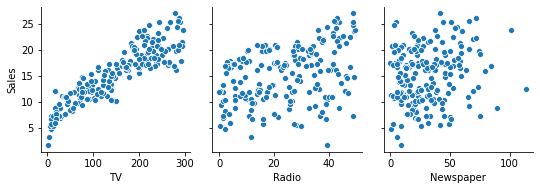

In [12]:
# pair plot
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

In [13]:
# understaiding the correlation 
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


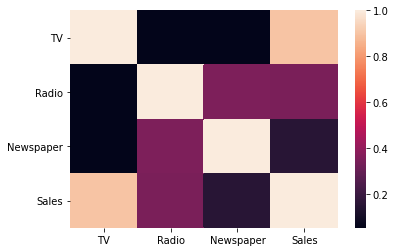

In [14]:
# heat map for under standing correlation
sns.heatmap(data= advertising.corr())

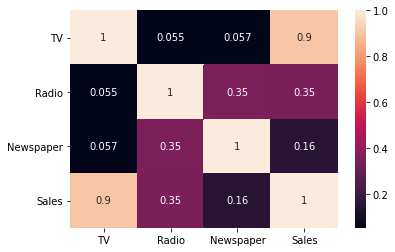

In [15]:
# to see the correlation numbers we should use annot=True property
sns.heatmap(data=advertising.corr(), annot = True)

In [0]:
# Model Creation Steps:
# 1. Create X and y ( X = data frame - Prdictor variales ).  y (Target variables)
# 2. Create train and test sets ( 70 -30 , 80- 20)
# 3. Train your model on the training set (i.e learn the coffeicints)
# 4. Evaluate model (training set, test set)

In [0]:
# 1. Create X and y
X = advertising['TV']
y = advertising['Sales']

In [22]:
# 2. train-test sets split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70,  random_state = 100)
X_train.shape

(140,)

In [25]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [26]:
# 3. training the model
# Note: by defualt stats model ignore the constant (c), so we need to add explicitly
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [28]:
# 4. fitting the model ( OLS: Ordinary Least Squares )
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [30]:
lr_model.summary()
# P value 0 mens, modle significant, if P value other than zero modle confidence will decrease

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 23 May 2020   Prob (F-statistic):           1.52e-52
Time:                        06:20:24   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [0]:
# Summary
# 1. coef and p-value
# 2. R-sqared is 81.6% , very high
# 3. p(F-Statistic) is low  => fit is not by chance

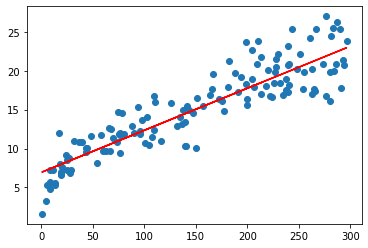

In [34]:
# ploting
plt.scatter(X_train, y_train)
# y = mx +c (c = 6.948, m = 0.054 ) 'r' ==> red color of line
plt.plot(X_train, 6.948 + 0.054 * X_train, 'r')
plt.show()

In [0]:
# y-train calculating y trained predicted
y_train_perd = lr_model.predict(X_train_sm)

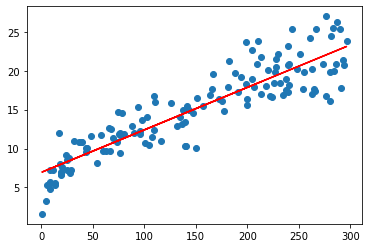

In [43]:
# ploting
plt.scatter(X_train, y_train)
# y = mx +c (c = 6.948, m = 0.054 ) 'r' ==> red color of line
plt.plot(X_train, y_train_perd, 'r')
plt.show()

In [0]:
## Step 3: Residual Analysis
# error = f (y_train - y_train_pred )
residuals = y_train - y_train_perd 

Text(0.5, 1.0, 'Residual Plot')

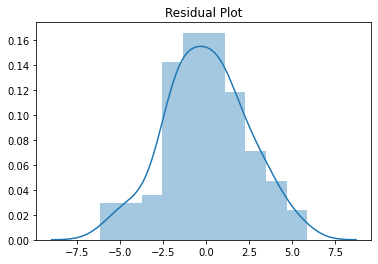

In [46]:
# plot the residuals
plt.figure()
sns.distplot(residuals)
plt.title('Residual Plot')

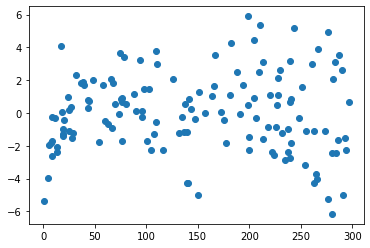

In [47]:
# looks for patterns in Residuals ( we should not be able to identify )
plt.scatter(X_train, residuals)
plt.show()

In [0]:
# Step 4: Prediction and Evaluation on the test step

# prediction on the test set (y_test_pred)
# evaluate the model , r- squared on test

In [51]:
# add const/intercept to test
X_test_sm = sm.add_constant(X_test)

# pred  on test
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [57]:
# evaluate the model , r- squared on test
# r squared
#r2 = r2_score()
#help(r2_score)
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.792103160124566

In [60]:
# r2 on train
r2_score(y_true = y_train, y_pred = y_train_perd)

0.8157933136480389

In [61]:
# mean squared error
mean_squared_error(y_true=y_test, y_pred = y_test_pred)

4.077556371826953

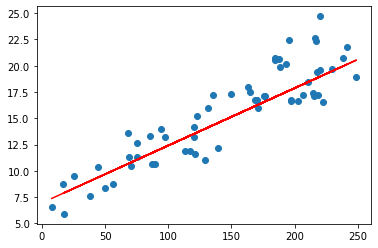

In [63]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()
